In [12]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [13]:
data = pd.read_csv('NSE-Tata_Global_Beverages_Limited.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 3:4].values
testing_set=data.iloc[930:,3:4].values
len(testing_set)

305

In [14]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open    High     Low   Close
0  2018-10-08  208.00  222.25  206.85  215.15
1  2018-10-05  217.00  218.60  205.90  209.20
2  2018-10-04  223.50  227.80  216.15  218.20
3  2018-10-03  230.00  237.50  225.75  227.60
4  2018-10-01  234.55  234.60  221.05  230.90


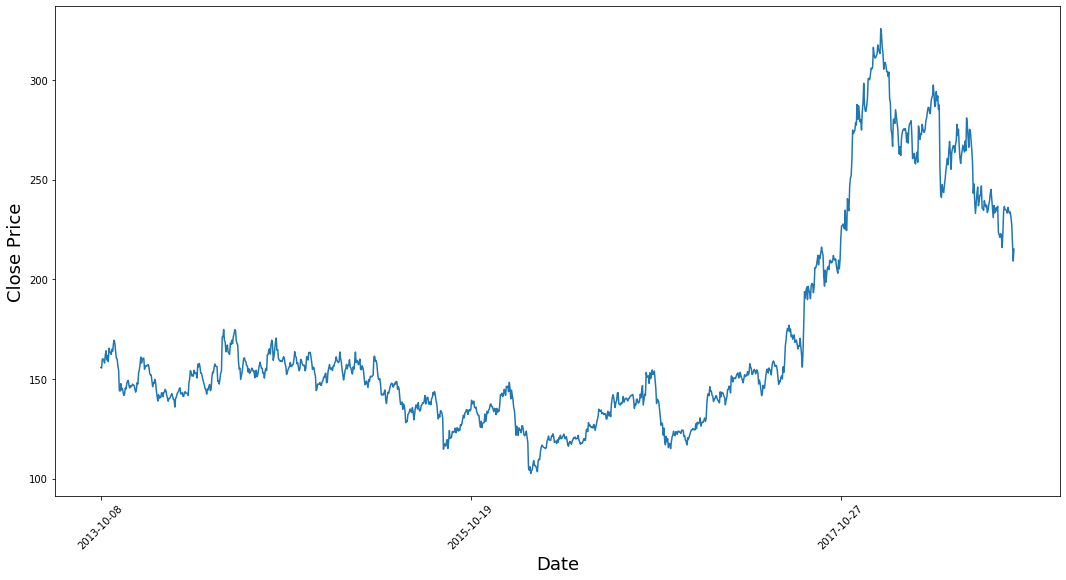

In [17]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Close']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)


Epoch 1/200
920/920 [==============================] - 2s 2ms/step - loss: 0.0742
Epoch 2/200
920/920 [==============================] - 0s 515us/step - loss: 0.0113
Epoch 3/200
920/920 [==============================] - 1s 597us/step - loss: 0.0044
Epoch 4/200
920/920 [==============================] - 0s 505us/step - loss: 0.0041
Epoch 5/200
920/920 [==============================] - 0s 508us/step - loss: 0.0034
Epoch 6/200
920/920 [==============================] - 0s 534us/step - loss: 0.0033
Epoch 7/200
920/920 [==============================] - 1s 582us/step - loss: 0.0032
Epoch 8/200
920/920 [==============================] - 1s 564us/step - loss: 0.0037
Epoch 9/200
920/920 [==============================] - 1s 550us/step - loss: 0.0032
Epoch 10/200
920/920 [==============================] - 0s 539us/step - loss: 0.0032
Epoch 11/200
920/920 [==============================] - 1s 578us/step - loss: 0.0031
Epoch 12/200
920/920 [==============================] - 1s 575us/step - los

920/920 [==============================] - 0s 540us/step - loss: 0.0020
Epoch 95/200
920/920 [==============================] - 1s 578us/step - loss: 0.0017
Epoch 96/200
920/920 [==============================] - 1s 546us/step - loss: 0.0018
Epoch 97/200
920/920 [==============================] - 0s 510us/step - loss: 0.0018
Epoch 98/200
920/920 [==============================] - 0s 511us/step - loss: 0.0016
Epoch 99/200
920/920 [==============================] - 0s 510us/step - loss: 0.0016
Epoch 100/200
920/920 [==============================] - 0s 528us/step - loss: 0.0015
Epoch 101/200
920/920 [==============================] - 0s 543us/step - loss: 0.0018
Epoch 102/200
920/920 [==============================] - 1s 563us/step - loss: 0.0018
Epoch 103/200
920/920 [==============================] - 0s 507us/step - loss: 0.0016
Epoch 104/200
920/920 [==============================] - 0s 505us/step - loss: 0.0015
Epoch 105/200
920/920 [==============================] - 0s 507us/step - 

920/920 [==============================] - 0s 542us/step - loss: 0.0011
Epoch 190/200
920/920 [==============================] - 0s 533us/step - loss: 0.0010
Epoch 191/200
920/920 [==============================] - 0s 542us/step - loss: 0.0010
Epoch 192/200
920/920 [==============================] - 0s 523us/step - loss: 9.3191e-04
Epoch 193/200
920/920 [==============================] - 0s 524us/step - loss: 0.0011
Epoch 194/200
920/920 [==============================] - 0s 523us/step - loss: 0.0010
Epoch 195/200
920/920 [==============================] - 0s 531us/step - loss: 0.0010
Epoch 196/200
920/920 [==============================] - 0s 542us/step - loss: 9.6125e-04
Epoch 197/200
920/920 [==============================] - 0s 523us/step - loss: 0.0011
Epoch 198/200
920/920 [==============================] - 1s 564us/step - loss: 0.0011
Epoch 199/200
920/920 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 200/200
920/920 [==============================] - 0s 

In [20]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


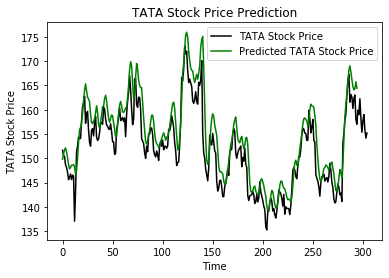

In [21]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()